## IterativeImputer
### This notebook outlines the usage of Iterative Imputer (Multivariate Imputation).
### Iterative Imputer substitutes missing values as a function of other features
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


#### How many Categorical variables in the dataset?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


#### How many Missing values in the dataset?

In [7]:
for i in range(len(df.columns)-1):
    missing_data = df[df.columns[i]].isna().sum()
    perc = missing_data / len(df) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}%')

Feature 1 >> Missing entries: 0  |  Percentage: 0.0%
Feature 2 >> Missing entries: 0  |  Percentage: 0.0%
Feature 3 >> Missing entries: 105  |  Percentage: 2.48%
Feature 4 >> Missing entries: 0  |  Percentage: 0.0%
Feature 5 >> Missing entries: 29  |  Percentage: 0.68%
Feature 6 >> Missing entries: 53  |  Percentage: 1.25%
Feature 7 >> Missing entries: 0  |  Percentage: 0.0%
Feature 8 >> Missing entries: 0  |  Percentage: 0.0%
Feature 9 >> Missing entries: 0  |  Percentage: 0.0%
Feature 10 >> Missing entries: 50  |  Percentage: 1.18%
Feature 11 >> Missing entries: 0  |  Percentage: 0.0%
Feature 12 >> Missing entries: 0  |  Percentage: 0.0%
Feature 13 >> Missing entries: 19  |  Percentage: 0.45%
Feature 14 >> Missing entries: 1  |  Percentage: 0.02%
Feature 15 >> Missing entries: 388  |  Percentage: 9.16%


<AxesSubplot:>

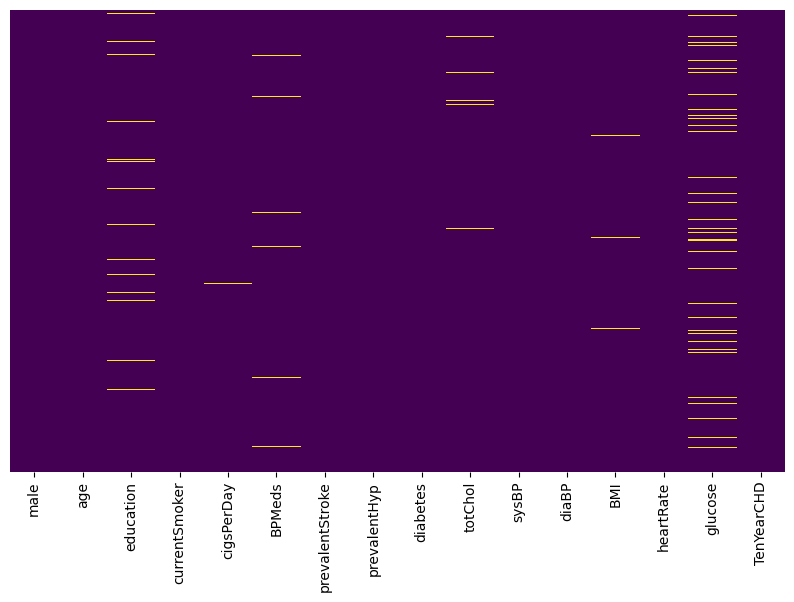

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

#### Import IterativeImputer

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#### Create IterativeImputer object with max_iterations and random_state=0

In [10]:
imputer = IterativeImputer(max_iter=10, random_state=0)

#### Fit the imputer model on dataset to perform iterative multivariate imputation

In [11]:
data = df.values

In [12]:
X = data[:, :-1]
y = data[:, -1]

In [13]:
imputer.fit(X)

IterativeImputer(random_state=0)

#### a copy

In [14]:
X_transform = imputer.transform(X)

#### double check

In [16]:
print(f"Missing cells: {sum(np.isnan(X_transform).flatten())}")

Missing cells: 0


<AxesSubplot:>

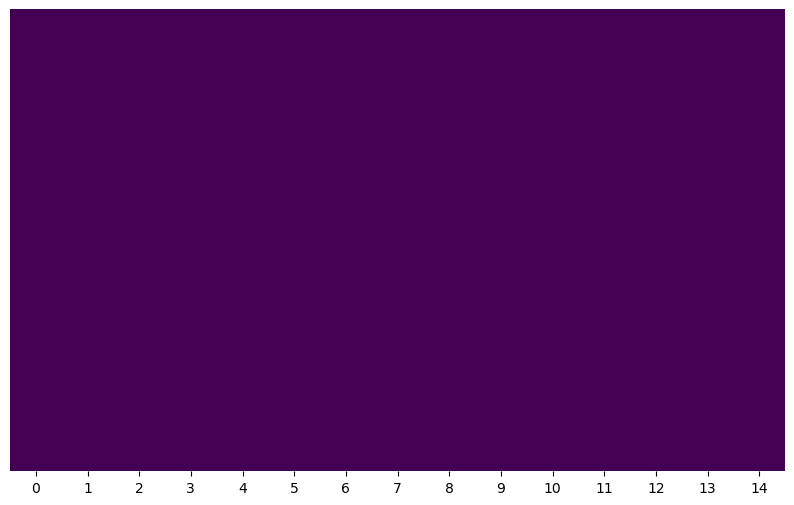

In [19]:
df_transform = pd.DataFrame(data=X_transform)

plt.figure(figsize=(10,6))
sns.heatmap(df_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

## now comes to exercise

### A. a Logistic Regression model, with dropping all rows with missing entries

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [27]:
df.shape

(4238, 16)

#### Drop rows with missing values

In [21]:
df = df.dropna()
df.shape

(3656, 16)

#### Split dataset into X and y

In [22]:
X = df[df.columns[:-1]]
X.shape

(3656, 15)

In [23]:
y = df[df.columns[-1]]
y.shape

(3656,)

#### Create a pipeline with model parameter

In [25]:
model = LogisticRegression()

In [26]:
pipeline = Pipeline([('model', model)])

#### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [27]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [28]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [29]:
scores

array([0.85245902, 0.85519126, 0.85245902, 0.84153005, 0.84699454,
       0.8442623 , 0.84383562, 0.85753425, 0.84109589, 0.84109589,
       0.85245902, 0.84972678, 0.85519126, 0.8442623 , 0.85519126,
       0.8442623 , 0.84109589, 0.84383562, 0.85205479, 0.84657534,
       0.84972678, 0.85245902, 0.85519126, 0.8442623 , 0.8579235 ,
       0.84699454, 0.84931507, 0.85205479, 0.84109589, 0.83835616])

#### Print the Mean Accuracy and Standard Deviation from scores

In [30]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.848  | Std: 0.006


### B. a Logistic Regression model, with IterativeImputer

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [32]:
df=pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/heart_disease.csv")

#### Split dataset into X and y

In [33]:
df.shape

(4238, 16)

In [34]:
X = df[df.columns[:-1]]
X.shape

(4238, 15)

In [35]:
y = df[df.columns[-1]]
y.shape

(4238,)

#### Create a IterativeImputer

In [36]:
imputer = IterativeImputer(max_iter=10, random_state=0)

#### Create a Logistic Regression model

In [37]:
model = LogisticRegression()

#### Create a pipeline with impute and model parameters

In [38]:
pipeline = Pipeline([('impute', imputer), ('model', model)])

#### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [39]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [40]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [41]:
scores

array([0.85141509, 0.85377358, 0.8490566 , 0.8490566 , 0.84669811,
       0.84669811, 0.8490566 , 0.8490566 , 0.84869976, 0.85106383,
       0.8490566 , 0.85141509, 0.85141509, 0.85613208, 0.84433962,
       0.84669811, 0.84433962, 0.8490566 , 0.84869976, 0.85106383,
       0.85377358, 0.85141509, 0.84433962, 0.84669811, 0.85377358,
       0.85141509, 0.8490566 , 0.85613208, 0.86052009, 0.8463357 ])

#### Print the Mean Accuracy and Standard Deviation

In [42]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.85  | Std: 0.004


### C. a RandomForest model, with IterativeImputer 

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [44]:
imputer = IterativeImputer(max_iter=10, random_state=0)

In [45]:
model = RandomForestClassifier()

In [46]:
pipeline = Pipeline([('impute', imputer), ('model', model)])

In [47]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [48]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [49]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.848  | Std: 0.007
